In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 89.2 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd
import pyogrio

In [4]:
yield_2020 = pd.read_csv('/content/2020_calibrated_yield.csv')
yield_2021 = pd.read_csv('/content/2021_calibrated_yield.csv')
yield_2022 = pd.read_csv('/content/2022_calibrated_yield.csv')
yield_2023 = pd.read_csv('/content/2023_calibrated_yield.csv')
yield_2024 = pd.read_csv('/content/2024_calibrated_yield.csv')

In [8]:
shapefile_top =    gpd.read_file('/content/2022_cc_driscoll_grid_9m_sorghum.shp')
shapefile_bottom = gpd.read_file('/content/2022_cc_driscoll_grid_9m_cotton.shp')


In [9]:
shapefile_top

,FID,geometry
0,0,"POLYGON ((628638 3061134, 628638 3061143, 6286..."
1,1,"POLYGON ((628647 3061134, 628647 3061143, 6286..."
2,2,"POLYGON ((628656 3061134, 628656 3061143, 6286..."
3,3,"POLYGON ((628665 3061134, 628665 3061143, 6286..."
4,4,"POLYGON ((628674 3061134, 628674 3061143, 6286..."
...,...,...
4279,4279,"POLYGON ((629664 3061548, 629664 3061557, 6296..."
4280,4280,"POLYGON ((629682 3061548, 629682 3061557, 6296..."
4281,4281,"POLYGON ((629691 3061548, 629691 3061557, 6297..."
4282,4282,"POLYGON ((629700 3061548, 629700 3061557, 6297..."


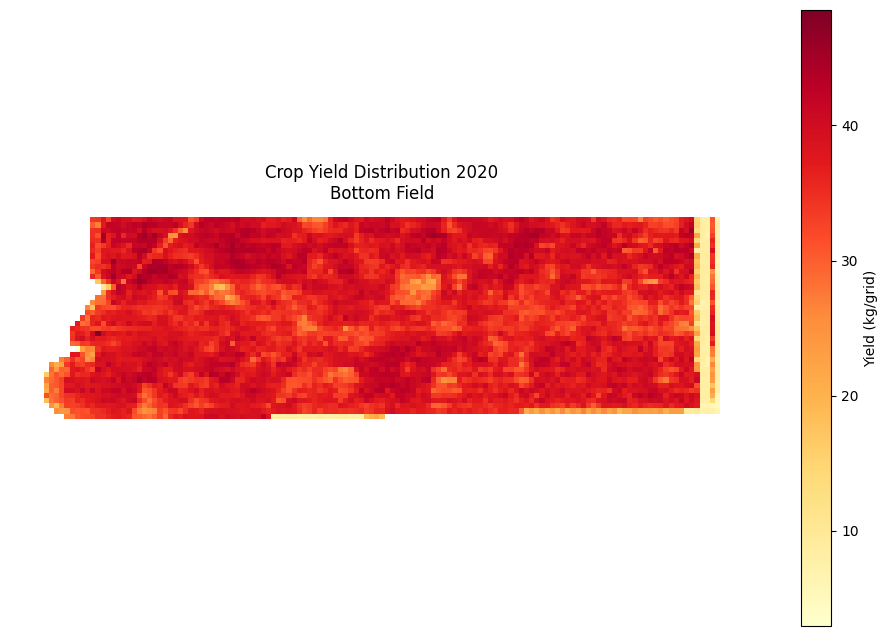

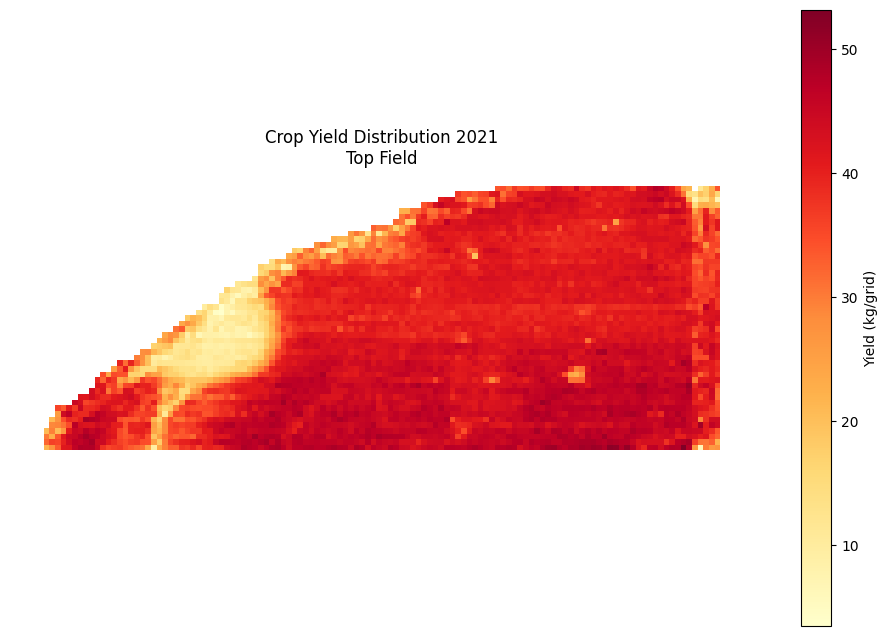

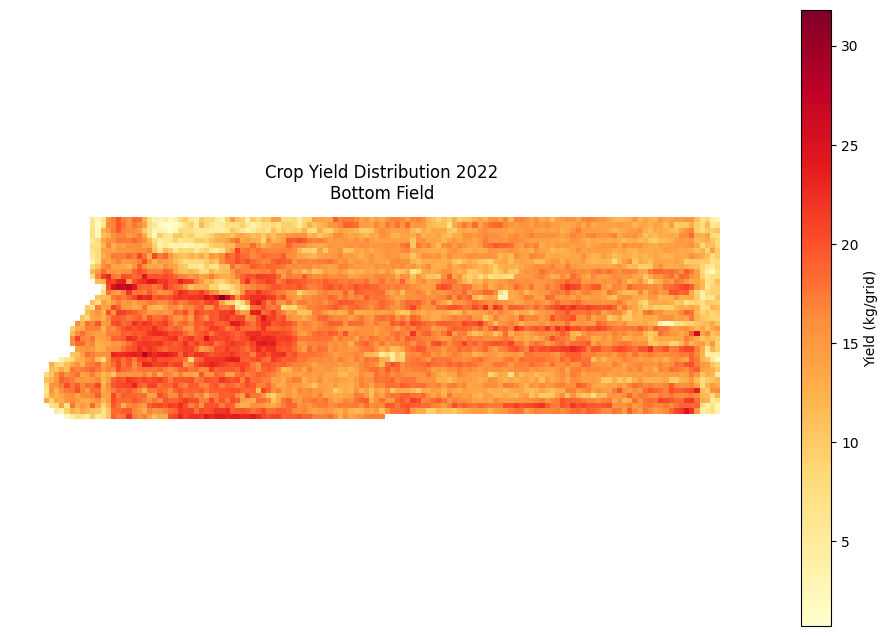

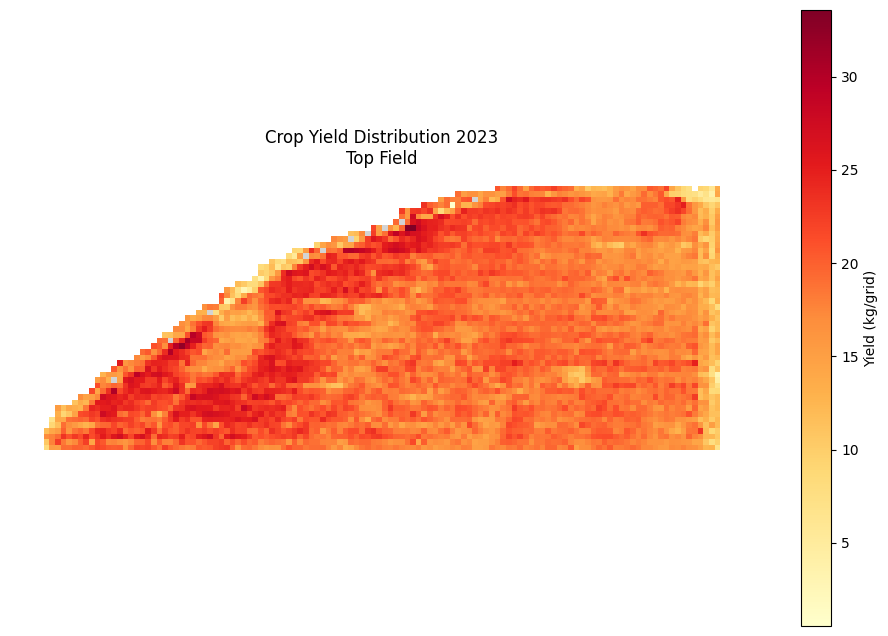

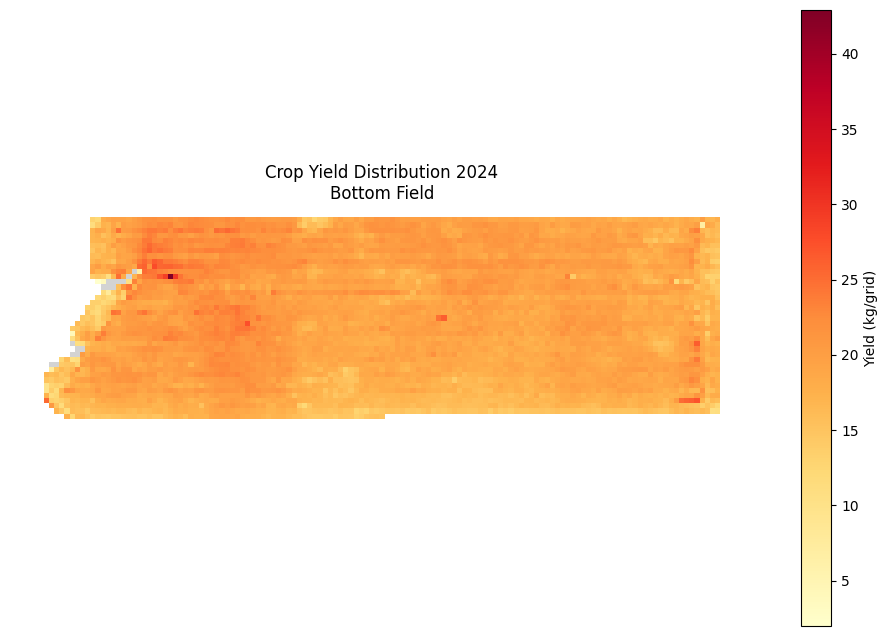

In [10]:
def plot_crop_yield(year, yield_data, shapefile_top, shapefile_bottom, cmap='YlOrRd'):


    # Select appropriate shapefile based on year
    shapefile = shapefile_top if year % 2 != 0 else shapefile_bottom
    field_location = "Top" if year % 2 != 0 else "Bottom"

    # Merge the shapefile with yield data based on FID
    merged_data = shapefile.merge(yield_data, on='FID', how='left')

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Plot the data
    merged_data.plot(
        column='YIELD_KG_GRID',
        ax=ax,
        legend=True,
        legend_kwds={
            'label': 'Yield (kg/grid)',
            'orientation': 'vertical'
        },
        cmap=cmap,
        missing_kwds={'color': 'lightgrey'}
    )

    # Add title and customize the plot
    plt.title(f'Crop Yield Distribution {year}\n{field_location} Field')
    plt.axis('off')

    return fig, ax


yield_data_dict = {
    2020: yield_2020,
    2021: yield_2021,
    2022: yield_2022,
    2023: yield_2023,
    2024: yield_2024
}

# Plot for all years
for year, yield_data in yield_data_dict.items():
    fig, ax = plot_crop_yield(year, yield_data, shapefile_top, shapefile_bottom)
    plt.show()

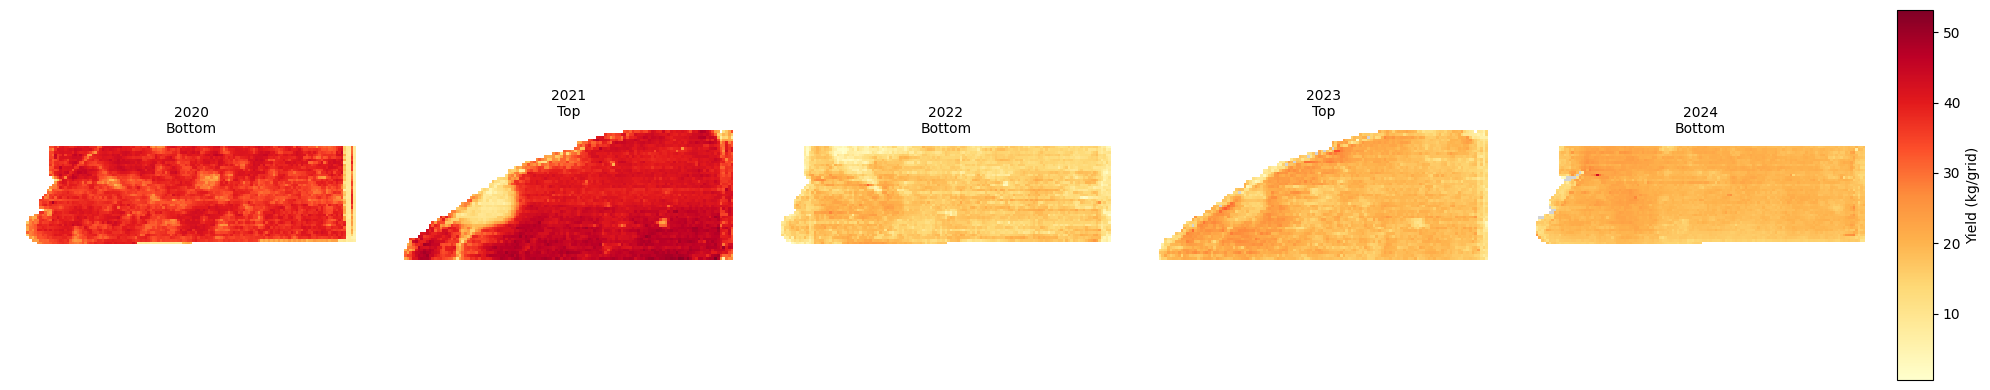

In [11]:
def plot_all_years_compact(yield_data_dict, shapefile_top, shapefile_bottom, cmap='YlOrRd'):

    fig = plt.figure(figsize=(20, 4))
    # Create GridSpec for better control of subplot layout
    gs = plt.GridSpec(1, 6, width_ratios=[1, 1, 1, 1, 1, 0.1])

    # Initialize min and max yield values
    all_yields = []

    # First pass to get yield range
    for year, yield_data in yield_data_dict.items():
        shapefile = shapefile_top if year % 2 != 0 else shapefile_bottom
        merged_data = shapefile.merge(yield_data, on='FID', how='left')
        all_yields.extend(merged_data['YIELD_KG_GRID'].dropna().values)

    vmin, vmax = np.nanmin(all_yields), np.nanmax(all_yields)

    # Create plots
    for idx, (year, yield_data) in enumerate(yield_data_dict.items()):
        ax = fig.add_subplot(gs[idx])

        shapefile = shapefile_top if year % 2 != 0 else shapefile_bottom
        field_location = "Top" if year % 2 != 0 else "Bottom"

        merged_data = shapefile.merge(yield_data, on='FID', how='left')

        # Plot without individual colorbars
        merged_data.plot(
            column='YIELD_KG_GRID',
            ax=ax,
            legend=False,
            cmap=cmap,
            missing_kwds={'color': 'lightgrey'},
            vmin=vmin,
            vmax=vmax
        )

        ax.set_title(f'{year}\n{field_location}', fontsize=10)
        ax.axis('off')

    # Add shared colorbar
    cax = fig.add_subplot(gs[-1])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, cax=cax, label='Yield (kg/grid)')

    plt.tight_layout()
    return fig

# Create the compact plot
fig = plot_all_years_compact(yield_data_dict, shapefile_top, shapefile_bottom)
plt.show()